# Ignore this part (Manual import)

In [3]:
import numpy as np
# import tensorflow as tf

import scipy
import os
from os import listdir
from scipy.io import loadmat
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
# from tensorflow.keras import regularizers
# from tensorflow.keras import activations

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
directory = "/media/mountHDD1/LanxHuyen/SEED_IV/eeg_feature_smooth/1/"
directories = ["/media/mountHDD1/LanxHuyen/SEED_IV/eeg_feature_smooth/{}/".format(i+1) for i in range(3)] 
print(directories)
channel_coords = [['0', '0', 'AF3', 'FP1', 'FPZ', 'FP2', 'AF4', '0', '0'], ['F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8'], ['FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8'], ['T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8'], ['TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8'], ['P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8'], ['0', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', '0'], ['0', '0', 'CB1', 'O1', 'OZ', 'O2', 'CB2', '0', '0']]

channel_list = ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']
print(len(channel_coords), len(channel_coords[0]))
coord_dict = {}
for n in range(len(channel_list)):
    for i, l in enumerate(channel_coords):
        for j, x in enumerate(l):
            if (channel_list[n] == x):
                coord_dict[n] = (i,j)
print(coord_dict)

['/media/mountHDD1/LanxHuyen/SEED_IV/eeg_feature_smooth/1/', '/media/mountHDD1/LanxHuyen/SEED_IV/eeg_feature_smooth/2/', '/media/mountHDD1/LanxHuyen/SEED_IV/eeg_feature_smooth/3/']
8 9
{0: (0, 3), 1: (0, 4), 2: (0, 5), 3: (0, 2), 4: (0, 6), 5: (1, 0), 6: (1, 1), 7: (1, 2), 8: (1, 3), 9: (1, 4), 10: (1, 5), 11: (1, 6), 12: (1, 7), 13: (1, 8), 14: (2, 0), 15: (2, 1), 16: (2, 2), 17: (2, 3), 18: (2, 4), 19: (2, 5), 20: (2, 6), 21: (2, 7), 22: (2, 8), 23: (3, 0), 24: (3, 1), 25: (3, 2), 26: (3, 3), 27: (3, 4), 28: (3, 5), 29: (3, 6), 30: (3, 7), 31: (3, 8), 32: (4, 0), 33: (4, 1), 34: (4, 2), 35: (4, 3), 36: (4, 4), 37: (4, 5), 38: (4, 6), 39: (4, 7), 40: (4, 8), 41: (5, 0), 42: (5, 1), 43: (5, 2), 44: (5, 3), 45: (5, 4), 46: (5, 5), 47: (5, 6), 48: (5, 7), 49: (5, 8), 50: (6, 1), 51: (6, 2), 52: (6, 3), 53: (6, 4), 54: (6, 5), 55: (6, 6), 56: (6, 7), 57: (7, 2), 58: (7, 3), 59: (7, 4), 60: (7, 5), 61: (7, 6)}


In [6]:
n = 24
perSample = ['de_movingAve', 'de_LDS', 'psd_movingAve', 'psd_LDS']
array = np.zeros(shape=(len(directories),len(os.listdir(directories[0])), n, 4, 8, 9, 5, 64)) # features = 4 datatypes*(8 x 9 eeg channel locs)*5 frequency bands*64 timestamps(zero padded) // trials = (3 sessions) x 15 people x 24 labels 
li = []
for h, dire in enumerate(directories):
    print(dire)
    data = [loadmat(dire + file) for file in os.listdir(dire)]
    for i, bigsample in enumerate(data):
        print(bigsample.keys())
        for j in range(n):
            for k, key in enumerate(perSample):
                sample = np.transpose(np.array(bigsample[key + str(j+1)]), (0,2,1))
                sample = np.pad(sample, [(0,0), (0,0), (0, 64-sample.shape[2])])
                for l, channel in enumerate(sample):
                    array[h][i][j][k][coord_dict[l][0]][coord_dict[l][1]] = channel

print(array.shape)

/media/mountHDD1/LanxHuyen/SEED_IV/eeg_feature_smooth/1/
dict_keys(['__header__', '__version__', '__globals__', 'de_movingAve1', 'de_LDS1', 'psd_movingAve1', 'psd_LDS1', 'de_movingAve2', 'de_LDS2', 'psd_movingAve2', 'psd_LDS2', 'de_movingAve3', 'de_LDS3', 'psd_movingAve3', 'psd_LDS3', 'de_movingAve4', 'de_LDS4', 'psd_movingAve4', 'psd_LDS4', 'de_movingAve5', 'de_LDS5', 'psd_movingAve5', 'psd_LDS5', 'de_movingAve6', 'de_LDS6', 'psd_movingAve6', 'psd_LDS6', 'de_movingAve7', 'de_LDS7', 'psd_movingAve7', 'psd_LDS7', 'de_movingAve8', 'de_LDS8', 'psd_movingAve8', 'psd_LDS8', 'de_movingAve9', 'de_LDS9', 'psd_movingAve9', 'psd_LDS9', 'de_movingAve10', 'de_LDS10', 'psd_movingAve10', 'psd_LDS10', 'de_movingAve11', 'de_LDS11', 'psd_movingAve11', 'psd_LDS11', 'de_movingAve12', 'de_LDS12', 'psd_movingAve12', 'psd_LDS12', 'de_movingAve13', 'de_LDS13', 'psd_movingAve13', 'psd_LDS13', 'de_movingAve14', 'de_LDS14', 'psd_movingAve14', 'psd_LDS14', 'de_movingAve15', 'de_LDS15', 'psd_movingAve15', 'psd_LD

# Actual implementation here

In [1]:
import numpy as np
# import tensorflow as tf

import scipy
import os
from os import listdir
from scipy.io import loadmat
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import cv2
from braindecode.datasets.bbci import BBCIDataset
# from braindecode.datautil.signalproc import highpass_cnt
# from tensorflow.keras import regularizers
# from tensorflow.keras import activations

2024-03-06 00:06:34.991980: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-06 00:06:35.600644: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/exx/GithubClonedRepo/EEG-Research/.env/lib/python3.10/site-packages/moabb/pipelines/__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


In [2]:
from braindecode.datasets import MOABBDataset, HGD

In [4]:
 dataset = HGD(subject_ids= 1)

Extracting EDF parameters from /home/exx/mne_data/MNE-schirrmeister2017-data/robintibor/high-gamma-dataset/raw/master/data/train/1.edf...
EDF file detected
Channel 'EEG Fp1' recognized as type EEG (renamed to 'Fp1').
Channel 'EEG Fp2' recognized as type EEG (renamed to 'Fp2').
Channel 'EEG Fpz' recognized as type EEG (renamed to 'Fpz').
Channel 'EEG F7' recognized as type EEG (renamed to 'F7').
Channel 'EEG F3' recognized as type EEG (renamed to 'F3').
Channel 'EEG Fz' recognized as type EEG (renamed to 'Fz').
Channel 'EEG F4' recognized as type EEG (renamed to 'F4').
Channel 'EEG F8' recognized as type EEG (renamed to 'F8').
Channel 'EEG FC5' recognized as type EEG (renamed to 'FC5').
Channel 'EEG FC1' recognized as type EEG (renamed to 'FC1').
Channel 'EEG FC2' recognized as type EEG (renamed to 'FC2').
Channel 'EEG FC6' recognized as type EEG (renamed to 'FC6').
Channel 'EEG M1' recognized as type EEG (renamed to 'M1').
Channel 'EEG T7' recognized as type EEG (renamed to 'T7').
Chan

In [21]:
dataset.description

,subject,session,run
0,1,0,0train
1,1,0,1test


In [5]:
from braindecode.preprocessing.preprocess import Preprocessor, preprocess
from braindecode.preprocessing.preprocess import exponential_moving_standardize
from braindecode.preprocessing.preprocess import exponential_moving_demean
from braindecode.preprocessing.windowers import create_windows_from_events

In [6]:
def load_preprocessed_data(subject_id, low_cut_hz, high_cut_hz, exponential_moving_fn,
                           only_C_sensors, do_common_average_reference, set_name):
    # log.info("Load dataset...")
    if set_name == 'hgd':
        dataset = MOABBDataset(dataset_name="Schirrmeister2017", subject_ids=[subject_id])
    else:
        assert set_name == "bcic_iv_2a"
        dataset = MOABBDataset(dataset_name="BNCI2014001", subject_ids=[subject_id])

    C_sensors = [
        'FC5', 'FC1', 'FC2', 'FC6', 'C3', 'Cz', 'C4', 'CP5',
        'CP1', 'CP2', 'CP6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6',
        'CP3', 'CPz', 'CP4', 'FFC5h', 'FFC3h', 'FFC4h', 'FFC6h', 'FCC5h',
        'FCC3h', 'FCC4h', 'FCC6h', 'CCP5h', 'CCP3h', 'CCP4h', 'CCP6h', 'CPP5h',
        'CPP3h', 'CPP4h', 'CPP6h', 'FFC1h', 'FFC2h', 'FCC1h', 'FCC2h', 'CCP1h',
        'CCP2h', 'CPP1h', 'CPP2h']
    EEG_sensors = ['Fp1', 'Fp2', 'Fpz', 'F7', 'F3', 'Fz', 'F4', 'F8',
            'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2',
            'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1',
            'Oz', 'O2', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FC3',
            'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CPz', 'CP4', 'P5', 'P1',
            'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8',
            'PO7', 'PO8', 'FT9', 'FT10', 'TPP9h', 'TPP10h', 'PO9', 'PO10', 'P9',
            'P10', 'AFF1', 'AFz', 'AFF2', 'FFC5h', 'FFC3h', 'FFC4h', 'FFC6h', 'FCC5h',
            'FCC3h', 'FCC4h', 'FCC6h', 'CCP5h', 'CCP3h', 'CCP4h', 'CCP6h', 'CPP5h',
            'CPP3h', 'CPP4h', 'CPP6h', 'PPO1', 'PPO2', 'I1', 'Iz', 'I2', 'AFp3h',
            'AFp4h', 'AFF5h', 'AFF6h', 'FFT7h', 'FFC1h', 'FFC2h', 'FFT8h', 'FTT9h',
            'FTT7h', 'FCC1h', 'FCC2h', 'FTT8h', 'FTT10h', 'TTP7h', 'CCP1h', 'CCP2h',
            'TTP8h', 'TPP7h', 'CPP1h', 'CPP2h', 'TPP8h', 'PPO9h', 'PPO5h', 'PPO6h',
            'PPO10h', 'POO9h', 'POO3h', 'POO4h', 'POO10h', 'OI1h', 'OI2h']
    if only_C_sensors:
        sensor_names = C_sensors
    else:
        sensor_names = EEG_sensors
    # Parameters for exponential moving standardization
    factor_new = 1e-3
    init_block_size = 1000

    # log.info("Preprocess dataset...")

    moving_fn ={'standardize': exponential_moving_standardize,
                'demean': exponential_moving_demean}[exponential_moving_fn]
    preprocessors = [
        # keep only C sensors
        Preprocessor(fn='load_data'),
    ]
    if set_name == "hgd":
        preprocessors.append(Preprocessor(fn='pick_channels', ch_names=sensor_names, ordered=True))
    else:
        assert set_name == 'bcic_iv_2a'
        preprocessors.append(Preprocessor("pick_types", eeg=True, meg=False, stim=False))  # Keep EEG sensors

    preprocessors.append(Preprocessor(fn=lambda x: x * 1e6, apply_on_array=True))
    preprocessors.append(Preprocessor(fn=lambda x: np.clip(x, -800, 800), apply_on_array=True))

    if do_common_average_reference:
        preprocessors.append(Preprocessor(fn='set_eeg_reference', ref_channels='average'),)
    preprocessors.extend([
        Preprocessor(fn='resample', sfreq=250),
        # bandpass filter
        Preprocessor(fn='filter', l_freq=low_cut_hz, h_freq=high_cut_hz),
        # exponential moving standardization
        Preprocessor(fn=moving_fn, factor_new=factor_new,
                     init_block_size=init_block_size, apply_on_array=True),
    ])

    # Transform the data
    preprocess(dataset, preprocessors)
    return dataset

In [7]:
def cut_windows(dataset, input_window_samples, window_stride_samples):
    ######################################################################
    # Cut the data into windows
    # -------------------------
    #

    ######################################################################
    # In contrast to trialwise decoding, we have to supply an explicit window size and window stride to the
    # ``create_windows_from_events`` function.
    #

    trial_start_offset_seconds = -0.5
    # Extract sampling frequency, check that they are same in all datasets
    sfreq = dataset.datasets[0].raw.info['sfreq']
    assert all([ds.raw.info['sfreq'] == sfreq for ds in dataset.datasets])

    # Calculate the trial start offset in samples.
    trial_start_offset_samples = int(trial_start_offset_seconds * sfreq)

    # Create windows using braindecode function for this. It needs parameters to define how
    # trials should be used.
    windows_dataset = create_windows_from_events(
        dataset,
        trial_start_offset_samples=trial_start_offset_samples,
        trial_stop_offset_samples=0,
        window_size_samples=input_window_samples,
        window_stride_samples=window_stride_samples,
        drop_last_window=False,
        preload=True,
        mapping={'left_hand': 0, 'right_hand': 1, 'feet': 2, 'rest': 3},
    )
    return windows_dataset

In [10]:
dataset = load_preprocessed_data(1, None, None, "standardize", True, False, "hgd")

Extracting EDF parameters from /home/exx/mne_data/MNE-schirrmeister2017-data/robintibor/high-gamma-dataset/raw/master/data/train/1.edf...
EDF file detected
Channel 'EEG Fp1' recognized as type EEG (renamed to 'Fp1').
Channel 'EEG Fp2' recognized as type EEG (renamed to 'Fp2').
Channel 'EEG Fpz' recognized as type EEG (renamed to 'Fpz').
Channel 'EEG F7' recognized as type EEG (renamed to 'F7').
Channel 'EEG F3' recognized as type EEG (renamed to 'F3').
Channel 'EEG Fz' recognized as type EEG (renamed to 'Fz').
Channel 'EEG F4' recognized as type EEG (renamed to 'F4').
Channel 'EEG F8' recognized as type EEG (renamed to 'F8').
Channel 'EEG FC5' recognized as type EEG (renamed to 'FC5').
Channel 'EEG FC1' recognized as type EEG (renamed to 'FC1').
Channel 'EEG FC2' recognized as type EEG (renamed to 'FC2').
Channel 'EEG FC6' recognized as type EEG (renamed to 'FC6').
Channel 'EEG M1' recognized as type EEG (renamed to 'M1').
Channel 'EEG T7' recognized as type EEG (renamed to 'T7').
Chan

/home/exx/GithubClonedRepo/EEG-Research/.env/lib/python3.10/site-packages/braindecode/preprocessing/preprocess.py:55: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn('Preprocessing choices with lambda functions cannot be saved.')


Filtering raw data in 1 contiguous segment

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal allpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Filter length: 1 samples (0.004 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal allpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Filter length: 1 samples (0.004 s)



In [11]:
import torch

In [12]:
def create_cropped_model(model_name, n_chans, resnet_init_a):
    ######################################################################
    # Now we create the model. To enable it to be used in cropped decoding
    # efficiently, we manually set the length of the final convolution layer
    # to some length that makes the receptive field of the ConvNet smaller
    # than ``input_window_samples`` (see ``final_conv_length=30`` in the model
    # definition).
    #

    cuda = torch.cuda.is_available()  # check if GPU is available, if True chooses to use it
    device = 'cuda' if cuda else 'cpu'
    if cuda:
        torch.backends.cudnn.benchmark = True
    seed = 20200220  # random seed to make results reproducible
    # Set random seed to be able to reproduce results
    set_random_seeds(seed=seed, cuda=cuda)

    n_classes = 4

    if model_name == 'shallow':
        model = ShallowFBCSPNet(
            n_chans,
            n_classes,
            input_window_samples=None, # no need to provide if final_conv_length given
            final_conv_length=30,
        )
    elif model_name == 'resnet':
        model = EEGResNet(
            n_chans,
            n_classes,
            input_window_samples=None, # no need to provide if final_conv_length given
            n_first_filters=48,
            final_pool_length=10,
            conv_weight_init_fn=partial(nn.init.kaiming_normal_, a=resnet_init_a))
    else:
        assert model_name == 'deep'
        model = Deep4Net(
            n_chans,
            n_classes,
            input_window_samples=None, # no need to provide if final_conv_length given
            final_conv_length=2,
        )

    # Send model to GPU
    if cuda:
        model.cuda()

    ######################################################################
    # And now we transform model with strides to a model that outputs dense
    # prediction, so we can use it to obtain predictions for all
    # crops.
    #
    if model_name in ["shallow", "deep"]:
        to_dense_prediction_model(model)
    return model

In [13]:
from braindecode.models.util import to_dense_prediction_model, get_output_shape
from braindecode.util import set_random_seeds
from braindecode.models import Deep4Net, EEGResNet
from braindecode.models import ShallowFBCSPNet
from functools import partial
from torch import nn

In [22]:
n_chans = dataset[0][0].shape[0]
input_window_samples = 1000
model = create_cropped_model("resnet", n_chans, 1)
n_preds_per_input = get_output_shape(model, n_chans, input_window_samples)[2]
windows_dataset = cut_windows(dataset, input_window_samples, window_stride_samples = n_preds_per_input)

Used Annotations descriptions: ['feet', 'left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['feet', 'left_hand', 'rest', 'right_hand']


/home/exx/GithubClonedRepo/EEG-Research/.env/lib/python3.10/site-packages/braindecode/util.py:51: UserWarning: torch.backends.cudnn.benchmark was set to True which may results in lack of reproducibility. In some cases to ensure reproducibility you may need to set torch.backends.cudnn.benchmark to False.
  warn(
/home/exx/GithubClonedRepo/EEG-Research/.env/lib/python3.10/site-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +
/home/exx/GithubClonedRepo/EEG-Research/.env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function get_output_shape is deprecated; will be removed in version 1.0. Use EEGModuleMixin.get_output_shape method directly on the model object.
  warnings.warn(msg, category=FutureWarning)


In [15]:
import matplotlib.pyplot as plt

In [16]:
dataset[0]

(array([[ 0.15195652],
        [-0.32394719],
        [-0.6326461 ],
        [-0.60757666],
        [ 1.73493326],
        [-0.63484238],
        [ 0.82088397],
        [ 1.65873519],
        [ 1.7885836 ],
        [ 0.25337762],
        [-0.3478911 ],
        [-0.24494296],
        [-0.93956382],
        [-0.73564813],
        [ 0.33689687],
        [ 1.08927847],
        [-0.89055584],
        [ 0.19471501],
        [ 2.07458747],
        [ 1.20420862],
        [-0.06110712],
        [ 0.09571256],
        [-0.59690387],
        [-0.44249819],
        [-0.95723389],
        [ 0.04059047],
        [ 0.76017189],
        [-0.54177651],
        [-0.05926847],
        [ 1.45171603],
        [ 2.76779906],
        [ 0.01984284],
        [ 0.94565326],
        [ 1.91206196],
        [ 1.68075763],
        [ 1.67125262],
        [ 0.3352831 ],
        [-0.64153491],
        [-0.81571469],
        [-0.60932229],
        [-1.48413238],
        [ 1.38313336],
        [-0.4311966 ],
        [ 1

In [17]:
dataset[0][0].shape[0]

45

In [18]:
print(n_chans)

45


In [19]:
print(n_preds_per_input)

424


In [20]:
print(len(windows_dataset))

960


In [27]:
print(windows_dataset[3])

(array([[ 0.5288986 , -0.20693935, -0.1975433 , ..., -0.14515981,
        -0.21381906, -0.14558774],
       [ 1.3096246 ,  0.9883058 ,  0.70145553, ..., -1.2244896 ,
        -1.0784098 , -1.0785573 ],
       [-0.9607983 , -1.365464  , -1.447604  , ..., -0.7222993 ,
        -0.7824642 , -0.90987253],
       ...,
       [-2.6985028 , -2.8680332 , -2.6235023 , ...,  0.38604832,
         0.5587799 ,  0.9791121 ],
       [ 0.7998513 ,  0.4985182 , -0.04932874, ...,  0.23279369,
         0.11365532,  0.1175653 ],
       [-0.86069316, -1.026033  , -1.6283381 , ...,  0.8016588 ,
         0.7092239 ,  0.98163253]], dtype=float32), 2, [1, 4363, 5363])


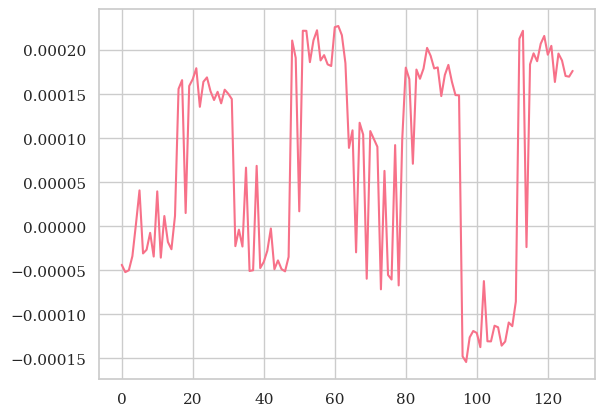

In [77]:
plt.plot(dataset[1][0])

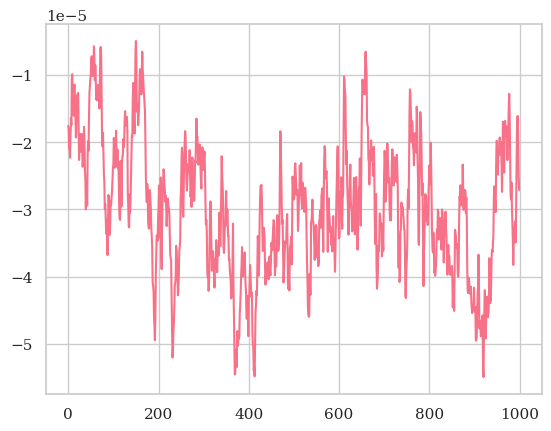

In [78]:
plt.plot(windows_dataset[2][0][0])

In [ ]:
print(dataset.info())

In [ ]:
for subject_id in range (10):
    dataset = MOABBDataset(dataset_name="Schirrmeister2017", subject_ids= [subject_id + 4])

In [15]:
dataset = BBCIDataset('/media/mountHDD1/LanxHuyen/high_gamma_dataset/data/test/1.mat').load()

Creating RawArray with float64 data, n_channels=128, n_times=616535
    Range : 0 ... 616534 =      0.000 ...  1233.068 secs
Ready.


RuntimeError: events cannot be set directly.

In [12]:
print(dataset[0])

TypeError: 'BBCIDataset' object is not subscriptable

In [ ]:
from torcheeg.datasets import SEEDIVDataset
from torcheeg import transforms
import torch

In [ ]:
dataset = SEEDIVDataset(io_path=f'/media/mountHDD1/LanxHuyen/SEED_IV/io/',                  
                        root_path='/media/mountHDD1/LanxHuyen/SEED_IV/eeg_raw_data',
                      online_transform=transforms.Compose([
                          transforms.ToTensor(),
                          transforms.To2d()
                      ]),
                      label_transform=transforms.Select('emotion'))


In [ ]:
print(type(dataset))
print(len(dataset))

In [ ]:
print(len(dataset[0]))
print(dataset[0])

In [ ]:
print(dataset[1][0].size())

In [ ]:
def process_trim_eeg(eeg_data, time_low=100, time_high=700):
    """
    
    """
    eeg_data = torch.squeeze(eeg_data, 0) # (1, 62, 800) to (62, 800)
    eeg_data = eeg_data[:, time_low:time_high]
    return eeg_data


# for sample in eeg_dataset:
#     sample = process_trim_eeg(sample)

In [ ]:
eeg_dataset = [k[0] for k in dataset]
eeg_labels = [k[1] for k in dataset]

In [ ]:
print(eeg_dataset[0].size())
print(eeg_dataset[0])
eeg_sample_trim = process_trim_eeg(eeg_dataset[0].clone())
print(eeg_sample_trim.size())
print(eeg_sample_trim)

In [ ]:
import torch.nn.functional as F
import cv2
def process_method_4(eeg, output_shape=(620, 600)):
    eeg = eeg.float()
    # Convert eeg to heatmap
    normalized_data = (eeg - eeg.min()) / (eeg.max() - eeg.min())
    # normalized_data = (eeg - eeg.mean()) / (eeg.std()) # Standard scaler
    # normalized_data = F.normalize(input=eeg, p=1, dim=1)
    # grayscale_images = (normalized_data * 255).to(torch.uint8)
    grayscale_images = (normalized_data * 255)
    print("Image after normalization to grayscale")
    print(grayscale_images.size())
    print(grayscale_images)
    grayscale_images = grayscale_images.unsqueeze(0).unsqueeze(0) # (1, 1, h, w)
    
    ## If EEG is not downsampled, uncomment below line.
    eeg_heatmap = F.interpolate(grayscale_images, size=output_shape, mode='bilinear').squeeze(0).squeeze(0)
    print("Image after interpolation")
    print(eeg_heatmap.size())
    print(eeg_heatmap)
    ##
    ## If EEG is downsampled 128Hz, uncomment below line.
    # eeg_heatmap = F.interpolate(grayscale_images, size=(4*128, 128), mode='bilinear')
    #Add edge detection to heatmap image
    eeg_heatmap = eeg_heatmap.to(torch.uint8).numpy()
    # eeg_heatmap = eeg_heatmap.numpy()
    eeg_heatmap = cv2.GaussianBlur(eeg_heatmap, (3, 3), 0)     
    edges = cv2.Canny(eeg_heatmap, 50, 150)
    print("Image after Canny")
    print(edges)
    # edges = cv2.adaptiveThreshold(eeg_heatmap, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)
    # edges = cv2.convertScaleAbs(edges)
    eeg_heatmap = eeg_heatmap + edges
    
    
    # Can try this to avoid UserWarning
    # eeg_heatmap = eeg_heatmap.clone().detach().requires_grad_(True) 
    eeg_heatmap = torch.tensor(eeg_heatmap, dtype=torch.float32)

    eeg_heatmap = eeg_heatmap.squeeze(0).squeeze(0)
    eeg_heatmap = eeg_heatmap.unsqueeze(0).repeat(3,  1, 1)
    
    
    return eeg_heatmap
    
# Apply method 4 to each tensor in eeg_tensors
# HEATMAP EEG DATASET
# sample_eeg = eeg_dataset[0].clone()
# sample_eeg = process_method_4(sample_eeg)

In [ ]:
eeg_sample = eeg_dataset[2].clone()
eeg_sample = process_trim_eeg(eeg_sample)
print(eeg_sample.size())
print(eeg_sample)
eeg_sample = process_method_4(eeg_sample)
print(eeg_sample.size())
# Plot heatmap image
image = eeg_sample[0,:,:]
print(f"Size of one channel heatmap image: {image.size()}")
print(image)

# Plot the one-channel image
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.show()

In [ ]:

print(eeg_sample)
